## Bank Transaction Classification

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import string
from collections import Counter

In [89]:
pd.options.mode.chained_assignment = None  # disable false positive warning about SettingWithCopyWarning

In [90]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bank.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,trans_id,date,value date,deposit,wdrawl,balance,t_desc
0,2009227,180901,180901,1800.0,0.0,36793.0,VIN/AMAZONINTE/948051154875/596608348875/
1,346565,180901,180901,0.0,17800.0,57538.3,REF:302426291684/157724298548/
2,863051,180901,180901,0.0,13200.0,31341.5,UPI/032332076657/UPI/q46004458@ybl/Paytm Payments
3,967352,180901,180901,0.0,16171.0,78761.9,UPI/117871255695/UPI/q50205117@ybl/Paytm Payments
4,967471,180901,180901,0.0,20200.0,58561.9,REF:017092635989/802484142006/
...,...,...,...,...,...,...,...
99755,3626622,181231,181231,62.3,0.0,13729.4,NEFT-N927852783428571-GPPF/INTEREST-AXIS BANK
99756,3627616,181231,181231,81.3,0.0,19544.9,NEFT-N175592009501463-UZVE/INTEREST-AXIS BANK
99757,3625403,181231,181231,60.2,0.0,14638.2,NEFT-N035911158572785-KEMR/INTEREST-SBI
99758,3626683,181231,181231,107.5,0.0,23453.0,NEFT-N366302381620227-KYJQ/INTEREST-AXIS BANK


**Note:** I got this data from a hackathon. The transaction statements are truncated by names to respect privacy. These aren't real statements 

In [91]:
df.pivot_table(index=['t_desc'], aggfunc='size')

t_desc
                                             5855
000070016532532-MANDATE/CCFJNYFL                1
000372154049846-MANDATE/YTWBNZHV                1
000735635002157/EMI/ICICI                       1
001160390569212-MANDATE/PTXEHXAB                1
                                             ... 
VIN/AMAZONINTE/998841579652/993222974001/       1
VIN/AMAZONINTE/998847905576/052584326472/       1
VIN/AMAZONINTE/999429922176/761997560224/       1
VIN/AMAZONINTE/999873089213/040319976173/       1
VIN/AMAZONINTE/999967372531/408787580281/       1
Length: 93906, dtype: int64

In [92]:
print('current rows: {}'.format(len(df)))
df['t_desc'].replace(' ', np.nan, inplace=True) #replacing blank statements with null values
df.dropna(subset=['t_desc'], inplace=True) #deleting rows with null values
df.reset_index(drop=True, inplace=True)
print('after deleting rows with empty values: {}'.format(len(df)))

current rows: 99760
after deleting rows with empty values: 93905


In [93]:
df['words'] = df['t_desc'].str.replace('[^a-zA-Z]', ',') #truncating numbers from transaction statements to make it more readable
df['words'] = df['words'].str.lstrip(',') #cutting extra commas from left
df['words'] = df['words'].str.rstrip(',') #cutting extra commas from right
df[['t_desc','words']]

,t_desc,words
0,VIN/AMAZONINTE/948051154875/596608348875/,"VIN,AMAZONINTE"
1,REF:302426291684/157724298548/,REF
2,UPI/032332076657/UPI/q46004458@ybl/Paytm Payments,"UPI,,,,,,,,,,,,,,UPI,q,,,,,,,,,ybl,Paytm,Payments"
3,UPI/117871255695/UPI/q50205117@ybl/Paytm Payments,"UPI,,,,,,,,,,,,,,UPI,q,,,,,,,,,ybl,Paytm,Payments"
4,REF:017092635989/802484142006/,REF
...,...,...
93900,NEFT-N927852783428571-GPPF/INTEREST-AXIS BANK,"NEFT,N,,,,,,,,,,,,,,,,GPPF,INTEREST,AXIS,BANK"
93901,NEFT-N175592009501463-UZVE/INTEREST-AXIS BANK,"NEFT,N,,,,,,,,,,,,,,,,UZVE,INTEREST,AXIS,BANK"
93902,NEFT-N035911158572785-KEMR/INTEREST-SBI,"NEFT,N,,,,,,,,,,,,,,,,KEMR,INTEREST,SBI"
93903,NEFT-N366302381620227-KYJQ/INTEREST-AXIS BANK,"NEFT,N,,,,,,,,,,,,,,,,KYJQ,INTEREST,AXIS,BANK"


In [94]:
# this function will replace continous string of comma with single comma
def delete_comma(char,s):
    while char*2 in s:
        s=s.replace(char*2,char)
    return s

In [95]:
for i in range(len(df['words'])):
  df['words'][i] = delete_comma(',',df['words'][i])

df[['t_desc','words']]

,t_desc,words
0,VIN/AMAZONINTE/948051154875/596608348875/,"VIN,AMAZONINTE"
1,REF:302426291684/157724298548/,REF
2,UPI/032332076657/UPI/q46004458@ybl/Paytm Payments,"UPI,UPI,q,ybl,Paytm,Payments"
3,UPI/117871255695/UPI/q50205117@ybl/Paytm Payments,"UPI,UPI,q,ybl,Paytm,Payments"
4,REF:017092635989/802484142006/,REF
...,...,...
93900,NEFT-N927852783428571-GPPF/INTEREST-AXIS BANK,"NEFT,N,GPPF,INTEREST,AXIS,BANK"
93901,NEFT-N175592009501463-UZVE/INTEREST-AXIS BANK,"NEFT,N,UZVE,INTEREST,AXIS,BANK"
93902,NEFT-N035911158572785-KEMR/INTEREST-SBI,"NEFT,N,KEMR,INTEREST,SBI"
93903,NEFT-N366302381620227-KYJQ/INTEREST-AXIS BANK,"NEFT,N,KYJQ,INTEREST,AXIS,BANK"


In [96]:
# extracting all type of words
ls = ''
for i in range(len(df['words'])):
  ls += df['words'][i]

wl = ls.split(sep=',')
wl[:10]

['VIN',
 'AMAZONINTEREFUPI',
 'UPI',
 'q',
 'ybl',
 'Paytm',
 'PaymentsUPI',
 'UPI',
 'q',
 'ybl']

In [97]:
cc = Counter(wl)
most_occur = cc.most_common(100) # selecting top 100 most occuring words
print(most_occur)

[('N', 23867), ('INTEREST', 18141), ('Paytm', 11577), ('BANKNEFT', 7659), ('HDFC', 6731), ('AXIS', 6665), ('NA', 5904), ('AMZN', 5904), ('Indian', 5904), ('UPI', 5805), ('q', 5805), ('ybl', 5805), ('I', 5781), ('Debit', 5781), ('UPIpaytmqr', 5772), ('Oid', 5748), ('add', 5748), ('money', 5748), ('paytm', 5748), ('PaymentsUPI', 4159), ('PNBNEFT', 3853), ('SBINEFT', 3753), ('ICICINEFT', 3733), ('OverseasUPI', 2137), ('PayTMUPI', 2087), ('PaytmPaymentsUPI', 2050), ('AMAZONINTEUPI', 1981), ('PENSION', 1947), ('PaymentsTRANSFER', 1760), ('BANKUPI', 1548), ('BANKTRANSFER', 1537), ('PaymentsIIN', 1038), ('PaymentsNEFT', 1036), ('GOVT', 1013), ('RETIREMENT', 1013), ('SCHEME', 1013), ('LIC', 1007), ('FUND', 981), ('PaymentsVIN', 974), ('PayTMTRANSFER', 912), ('AMAZONINTETRANSFER', 881), ('PaytmPaymentsTRANSFER', 877), ('OverseasTRANSFER', 840), ('ICICIUPI', 769), ('SBIUPI', 767), ('SBITRANSFER', 731), ('ICICITRANSFER', 724), ('PNBTRANSFER', 721), ('PNBUPI', 714), ('OverseasIIN', 561), ('AMAZONI

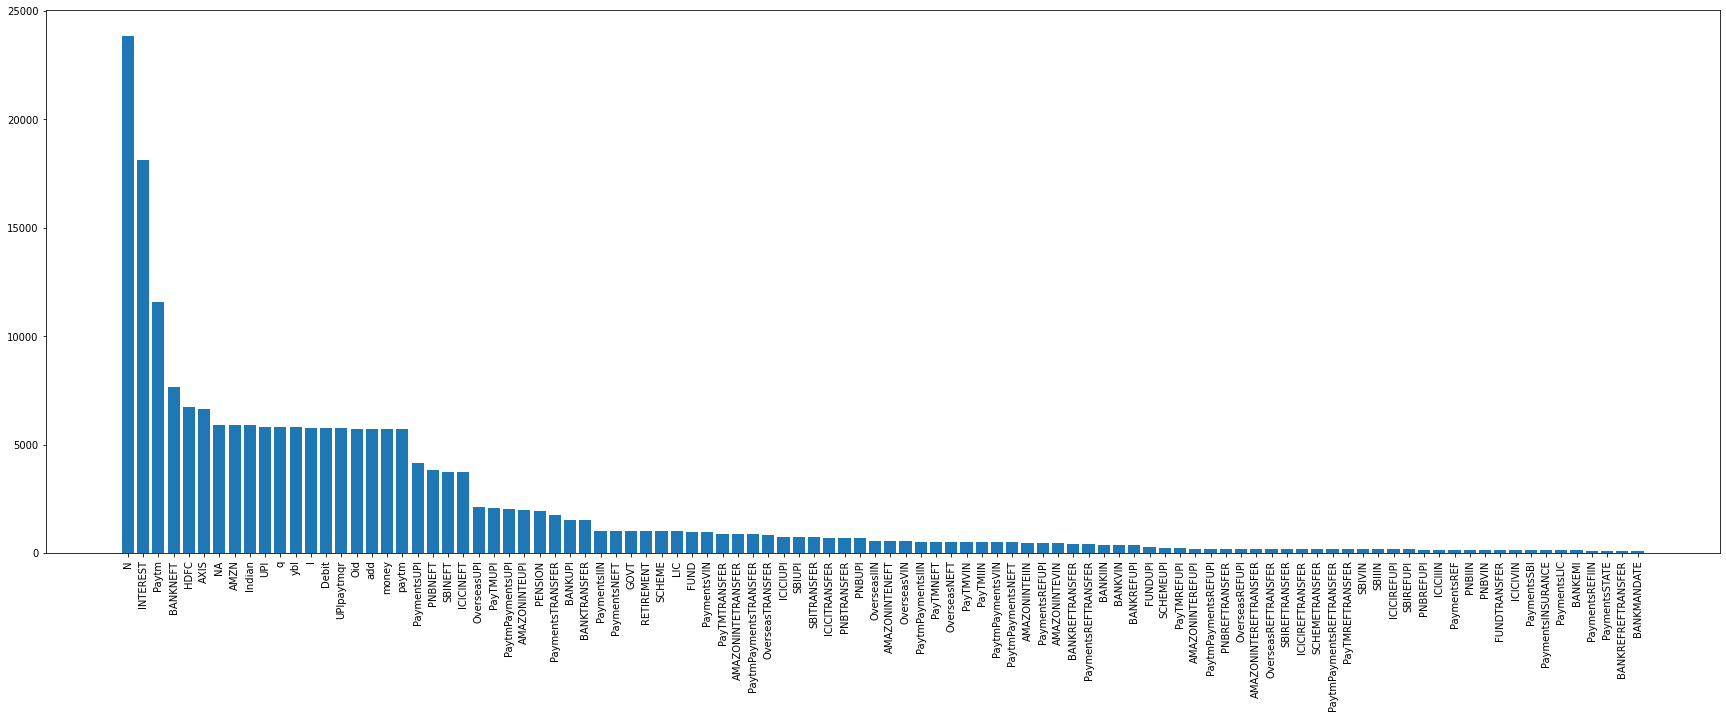

In [98]:
labels, ys = zip(*most_occur)
xs = np.arange(len(labels)) 
width = 0.8

plt.figure(figsize=(30,10))
plt.bar(xs, ys, width, align='center')

plt.xticks(rotation=90);
plt.xticks(xs, labels);

### Conclusion


*   Most payments were done via paytm, upi, upi qr codes, paytm/amazon qr codes. It is safe to assume that most of these are groceries.
*   Other common and obvious words are INTEREST, INSURANCE, LIC, EMI, MANDATE, FUND, RETIREMENT, SCHEME, PENSION, TRANSFER, REF, EMI and Bank Names.

In [99]:
# converting int dates into readable format
for i in range(len(df['date'])):
  df['date'][i] = str(pd.to_datetime(str(df['date'][i]), yearfirst=True))[:10]
  df['value date'][i] = str(pd.to_datetime(str(df['value date'][i]), yearfirst=True))[:10]
df[['date', 'value date']][:10]

,date,value date
0,2018-09-01,2018-09-01
1,2018-09-01,2018-09-01
2,2018-09-01,2018-09-01
3,2018-09-01,2018-09-01
4,2018-09-01,2018-09-01
5,2018-09-01,2018-09-01
6,2018-09-01,2018-09-01
7,2018-09-01,2018-09-01
8,2018-09-01,2018-09-01
9,2018-09-01,2018-09-01


In [100]:
df['label'] = ''

keywords = [['IIN','VIN','Oid','UPIpaytmqr','ybl','AMZN'],
            ['INTEREST'],
            ['INSURANCE','LIC'],
            ['EMI','MANDATE'],
            ['FUND','RETIREMENT']]
# Labelling the obvious reoccuring keywords
for i in range(len(keywords)):
  for kw in keywords[i]:
    for n in range(len(df)):

      if (kw in df['words'][n]) and (i==0):
        df['label'][n] = 'grocery'

      elif (kw in df['words'][n]) and (i==1):
        df['label'][n] = 'interest'

      elif (kw in df['words'][n]) and (i==2):
        df['label'][n] = 'insurance'
      
      elif (kw in df['words'][n]) and (i==3):
        df['label'][n] = 'loan_payment'

      elif (kw in df['words'][n]) and (i==4):
        df['label'][n] = 'pension'

df['label'].replace('', 'personal', inplace=True)
print(df.pivot_table(index=['label'], aggfunc='size'))

label
grocery         34616
insurance        2022
interest        18133
loan_payment     1784
pension          2960
personal        34390
dtype: int64


### Conclusion


*   Most transactions were groceries and personal. Least transactions were loan payments.
*   Transactions of Interest were much greater than that of loan payments.
(This might be because usually one family member is paying loan, but multiple family members are getting interests of FD, RD etc. to save taxes.)



In [101]:
# the sum column will add the counter of most occuring words together, 
# this will make it trainable for our model
df['sum'] = 0
for i in range(len(df)):
  s = 0
  for mo,n in most_occur:
    if mo in df['words'][i]:
      s += n
  df['sum'][i] = s

df

,trans_id,date,value date,deposit,wdrawl,balance,t_desc,words,label,sum
0,2009227,2018-09-01,2018-09-01,1800.0,0.0,36793.0,VIN/AMAZONINTE/948051154875/596608348875/,"VIN,AMAZONINTE",grocery,29648
1,346565,2018-09-01,2018-09-01,0.0,17800.0,57538.3,REF:302426291684/157724298548/,REF,personal,0
2,863051,2018-09-01,2018-09-01,0.0,13200.0,31341.5,UPI/032332076657/UPI/q46004458@ybl/Paytm Payments,"UPI,UPI,q,ybl,Paytm,Payments",grocery,34773
3,967352,2018-09-01,2018-09-01,0.0,16171.0,78761.9,UPI/117871255695/UPI/q50205117@ybl/Paytm Payments,"UPI,UPI,q,ybl,Paytm,Payments",grocery,34773
4,967471,2018-09-01,2018-09-01,0.0,20200.0,58561.9,REF:017092635989/802484142006/,REF,personal,0
...,...,...,...,...,...,...,...,...,...,...
93900,3626622,2018-12-31,2018-12-31,62.3,0.0,13729.4,NEFT-N927852783428571-GPPF/INTEREST-AXIS BANK,"NEFT,N,GPPF,INTEREST,AXIS,BANK",interest,54454
93901,3627616,2018-12-31,2018-12-31,81.3,0.0,19544.9,NEFT-N175592009501463-UZVE/INTEREST-AXIS BANK,"NEFT,N,UZVE,INTEREST,AXIS,BANK",interest,54454
93902,3625403,2018-12-31,2018-12-31,60.2,0.0,14638.2,NEFT-N035911158572785-KEMR/INTEREST-SBI,"NEFT,N,KEMR,INTEREST,SBI",interest,47789
93903,3626683,2018-12-31,2018-12-31,107.5,0.0,23453.0,NEFT-N366302381620227-KYJQ/INTEREST-AXIS BANK,"NEFT,N,KYJQ,INTEREST,AXIS,BANK",interest,54454


### Conclusion
Notice how transactions labelled 'interest' have sum value around 50k, but groceries have around 30k. This is numerical categorization of 'words' column

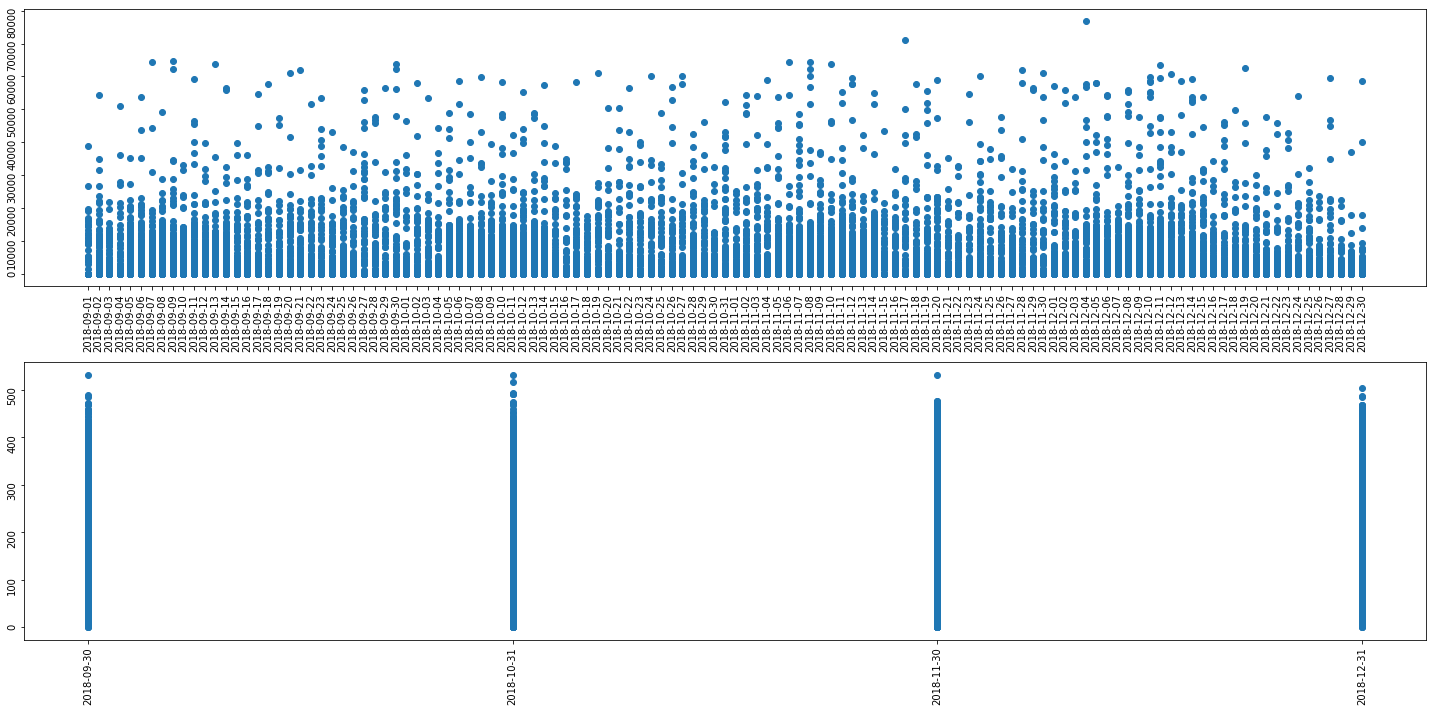

In [102]:
x,y = [0]*len(df),[0]*len(df)
x[0] = df['date'].loc[(df['label'] == 'grocery')]
y[0] = df['wdrawl'].loc[(df['label'] == 'grocery')]

x[1] = df['date'].loc[(df['label'] == 'interest')]
y[1] = df['deposit'].loc[(df['label'] == 'interest')]


fig, ax = plt.subplots(2, figsize=(20, 10))
plt.xticks(rotation=90)
ax[0].scatter(x[0], y[0])
ax[1].scatter(x[1], y[1])
for ax in fig.axes:
    ax.tick_params(labelrotation=90)

plt.tight_layout()
plt.show()

### Conclusion
* Most transaction labelled grocery were under 3k.
* Very few transactions labelled grocery were around 7k.
* All interest transaction happened at the end of month.

This visualization proves that the labellings are done properly with minimal errors.

In [103]:
dff = df[['date', 'deposit', 'wdrawl', 'balance', 'sum', 'label']].copy()
dff.dtypes
# df is our original dataframe.
# dff is our dataframe preparing for training.

date        object
deposit    float64
wdrawl     float64
balance    float64
sum          int64
label       object
dtype: object

In [104]:
# this function will convert labelling of our data into numbers to make it trainable
def label_to_int(label, i):
  if label[i] == 'personal':
    label[i] = 0
  
  elif label[i] == 'grocery':
    label[i] = 1

  elif label[i] == 'interest':
    label[i] = 2

  elif label[i] == 'loan_payment':
    label[i] = 3

  elif label[i] == 'pension':
    label[i] = 4

  elif label[i] == 'insurance':
    label[i] = 5

In [105]:
for i in range(len(dff)):
  label_to_int(dff['label'],i)

  dff['date'][i] = dff['date'][i].replace('-', '')[4:] #converting dates back to int to prepare them for training

In [106]:
dff['date'] = pd.to_numeric(dff['date'])
dff.pop('label')
dff.dtypes

date         int64
deposit    float64
wdrawl     float64
balance    float64
sum          int64
dtype: object

In [107]:
# normalizing our data
predictor_vars = dff.columns

for col in predictor_vars:
    col_mean = dff[col].mean()
    col_std = dff[col].std()
    if col_std == 0:
        col_std = 1e-5
    dff[col] = (dff[col] - col_mean) / col_std

dff

,date,deposit,wdrawl,balance,sum
0,-1.490050,-0.185768,-0.449374,-0.281779,-0.179433
1,-1.490050,-0.388632,2.188881,0.522861,-1.936738
2,-1.490050,-0.388632,1.507085,-0.493224,0.124338
3,-1.490050,-0.388632,1.947436,1.346053,0.124338
4,-1.490050,-0.388632,2.544601,0.562563,-1.936738
...,...,...,...,...,...
93900,1.503512,-0.381611,-0.449374,-1.176338,1.290876
93901,1.503512,-0.379470,-0.449374,-0.950775,1.290876
93902,1.503512,-0.381848,-0.449374,-1.141089,0.895826
93903,1.503512,-0.376517,-0.449374,-0.799193,1.290876


In [108]:
import tensorflow as tf

In [109]:
target = df.pop('label')
target

0         grocery
1        personal
2         grocery
3         grocery
4        personal
           ...   
93900    interest
93901    interest
93902    interest
93903    interest
93904    interest
Name: label, Length: 93905, dtype: object

In [110]:
# converting target labels back to numbers
for i in range(len(target)):
  label_to_int(target,i)
target = pd.to_numeric(target)
target

0        1
1        0
2        1
3        1
4        0
        ..
93900    2
93901    2
93902    2
93903    2
93904    2
Name: label, Length: 93905, dtype: int64

In [111]:
dff

,date,deposit,wdrawl,balance,sum
0,-1.490050,-0.185768,-0.449374,-0.281779,-0.179433
1,-1.490050,-0.388632,2.188881,0.522861,-1.936738
2,-1.490050,-0.388632,1.507085,-0.493224,0.124338
3,-1.490050,-0.388632,1.947436,1.346053,0.124338
4,-1.490050,-0.388632,2.544601,0.562563,-1.936738
...,...,...,...,...,...
93900,1.503512,-0.381611,-0.449374,-1.176338,1.290876
93901,1.503512,-0.379470,-0.449374,-0.950775,1.290876
93902,1.503512,-0.381848,-0.449374,-1.141089,0.895826
93903,1.503512,-0.376517,-0.449374,-0.799193,1.290876


In [112]:
dff = np.asarray(dff).astype(np.float32)
target = np.asarray(target).astype(np.float32)
#converting data to float, to convert into tesnsor

In [113]:
train_dataset = tf.data.Dataset.from_tensor_slices((dff[:92000], target[:92000]))
test_dataset = tf.data.Dataset.from_tensor_slices((dff[500:1000]))
# random slice of test dataset

train_dataset = train_dataset.batch(100)
test_dataset = test_dataset.batch(1)

print('len of train_dataset: {} & test_dataset: {}'.format(len(train_dataset), len(test_dataset)))

len of train_dataset: 920 & test_dataset: 500


In [114]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(32, activation='relu', input_shape=(92000,5)),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(6, activation='softmax')
])
# our model consist of 3 relu layers, 2 dropout layers. And the final one is
# sigmoid. These parameters are optimal for multi classification.
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics='accuracy')
# usign adam optimizer with CategoricalCrossentropy.

In [115]:
model.build()
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 92000, 32)         192       
_________________________________________________________________
dense_32 (Dense)             (None, 92000, 16)         528       
_________________________________________________________________
dropout_16 (Dropout)         (None, 92000, 16)         0         
_________________________________________________________________
dense_33 (Dense)             (None, 92000, 8)          136       
_________________________________________________________________
dropout_17 (Dropout)         (None, 92000, 8)          0         
_________________________________________________________________
dense_34 (Dense)             (None, 92000, 6)          54        
Total params: 910
Trainable params: 910
Non-trainable params: 0
________________________________________________________

In [116]:
model.fit(train_dataset, epochs=20)

Epoch 1/20
920/920 [==============================] - 2s 2ms/step - loss: 1.2962 - accuracy: 0.5361
Epoch 2/20
920/920 [==============================] - 1s 2ms/step - loss: 0.9103 - accuracy: 0.6699
Epoch 3/20
920/920 [==============================] - 2s 2ms/step - loss: 0.7714 - accuracy: 0.7068
Epoch 4/20
920/920 [==============================] - 1s 2ms/step - loss: 0.7149 - accuracy: 0.7332
Epoch 5/20
920/920 [==============================] - 2s 2ms/step - loss: 0.6712 - accuracy: 0.7486
Epoch 6/20
920/920 [==============================] - 1s 2ms/step - loss: 0.6413 - accuracy: 0.7607
Epoch 7/20
920/920 [==============================] - 2s 2ms/step - loss: 0.6178 - accuracy: 0.7716
Epoch 8/20
920/920 [==============================] - 2s 2ms/step - loss: 0.6015 - accuracy: 0.7789
Epoch 9/20
920/920 [==============================] - 1s 2ms/step - loss: 0.5937 - accuracy: 0.7807
Epoch 10/20
920/920 [==============================] - 1s 2ms/step - loss: 0.5814 - accuracy: 0.7834

In [118]:
predictions = model.predict(test_dataset)
c = np.argmax(predictions, axis = 1)
target = target[500:1000]
target = np.asarray(target).astype(np.int32)
accuracy = 0.0
for i in range(len(target)):
  if c[i] == target[i]:
    accuracy += 1.0
accuracy *= 100/500
print('Accuracy: {:.2f}%'.format(accuracy))

Accuracy: 84.60%


### Conclusion
* Accuracy of our model was 84.60%.
* With real pre labelled data, I'm confident we can improve our accuracy upto 95%.
* Frauds can be detected by visualizing personal data.